In [12]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../data/'

In [13]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [15]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
print(app_train['AMT_ANNUITY'].head())
app_train['AMT_ANNUITY'].describe()
app_train.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0)

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [17]:
print("non-NA values =",app_train['AMT_ANNUITY'].count())
print("Minimum value =",app_train['AMT_ANNUITY'].min())
print("Maximum value =",app_train['AMT_ANNUITY'].max())
print("Median(50%) value =",app_train['AMT_ANNUITY'].median())
print("Sample variance =",app_train['AMT_ANNUITY'].var())
print("Skewness =",app_train['AMT_ANNUITY'].skew()) 
print("Kurtosis =",app_train['AMT_ANNUITY'].kurt())  


non-NA values = 307499
Minimum value = 1615.5
Maximum value = 258025.5
Median(50%) value = 24903.0
Sample variance = 210068421.35962632
Skewness = 1.5797773638612507
Kurtosis = 7.707319914804311


Text(0.5,1,'Histogram of AMT_ANNUITY')

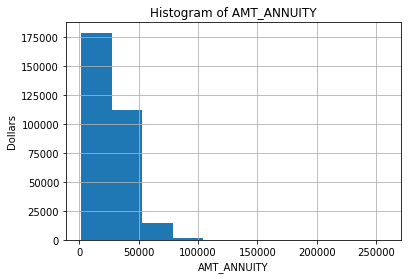

In [18]:

app_train['AMT_ANNUITY'].hist(bins=10)
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Dollars')
plt.title('Histogram of AMT_ANNUITY')


In [20]:
data ={'AMT_ANNUITY':app_train['AMT_ANNUITY'],'AMT_CREDIT':app_train['AMT_CREDIT'],'AMT_INCOME_TOTAL':app_train['AMT_INCOME_TOTAL']}
df = pd.DataFrame(data, columns = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL'])
print(df.head())

print("this is AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL Correlation Matrix")
print(df.corr())

print("this is AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL Covariance Matrix")
print(df.cov())

   AMT_ANNUITY  AMT_CREDIT  AMT_INCOME_TOTAL
0      24700.5    406597.5          202500.0
1      35698.5   1293502.5          270000.0
2       6750.0    135000.0           67500.0
3      29686.5    312682.5          135000.0
4      21865.5    513000.0          121500.0
this is AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL Correlation Matrix
                  AMT_ANNUITY  AMT_CREDIT  AMT_INCOME_TOTAL
AMT_ANNUITY          1.000000    0.770138          0.191657
AMT_CREDIT           0.770138    1.000000          0.156870
AMT_INCOME_TOTAL     0.191657    0.156870          1.000000
this is AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL Covariance Matrix
                   AMT_ANNUITY    AMT_CREDIT  AMT_INCOME_TOTAL
AMT_ANNUITY       2.100684e+08  4.492695e+09      6.587001e+08
AMT_CREDIT        4.492695e+09  1.619988e+11      1.497168e+10
AMT_INCOME_TOTAL  6.587001e+08  1.497168e+10      5.622739e+10
